# Proyecto 1 – Relación Minutos Ingreso

### Integrantes
- Camilo Andres Galeano Trujillo

### Problema
En una empresa de telecomunicaciones se requiere saber si existe alguna relación entre distintas variables de los clientes enfocadas en el comportamiento y el uso de estos en la empresa. Las variables son:

- totrev: Ingresos del cliente.

- totmou: Total de minutos usados por el cliente.

- creditcd: Indicador de tarjeta de crédito.

- eqpdays: Número de días (antigüedad) del equipo actual.

### Enlace GitHub

<https://github.com/cgatrujillo/ml-ean>

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/Izainea/seminario-de-programacion/master/Cuadernos/Clase%202/Bases/Credito_dias.csv')
df.head()

,totmou,totrev,creditcd,eqpdays,Customer_ID
0,7269.0,906.58,Y,371,1082423
1,13552.0,1172.25,N,83,1069232
2,4152.0,577.39,Y,675,1031705
3,1863.0,294.26,Y,218,1089806
4,4155.0,433.16,N,222,1076695


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   totmou       10000 non-null  float64
 1   totrev       10000 non-null  float64
 2   creditcd     9848 non-null   object 
 3   eqpdays      10000 non-null  int64  
 4   Customer_ID  10000 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 390.8+ KB


In [11]:
df.groupby('creditcd')['Customer_ID'].count().reset_index()

,creditcd,Customer_ID
0,N,3052
1,Y,6796


[Text(0.5, 0, 'Crédito'),
 Text(0, 0.5, 'Cantidad'),
 Text(0.5, 1.0, 'Cantidad de usuarios con crédito')]

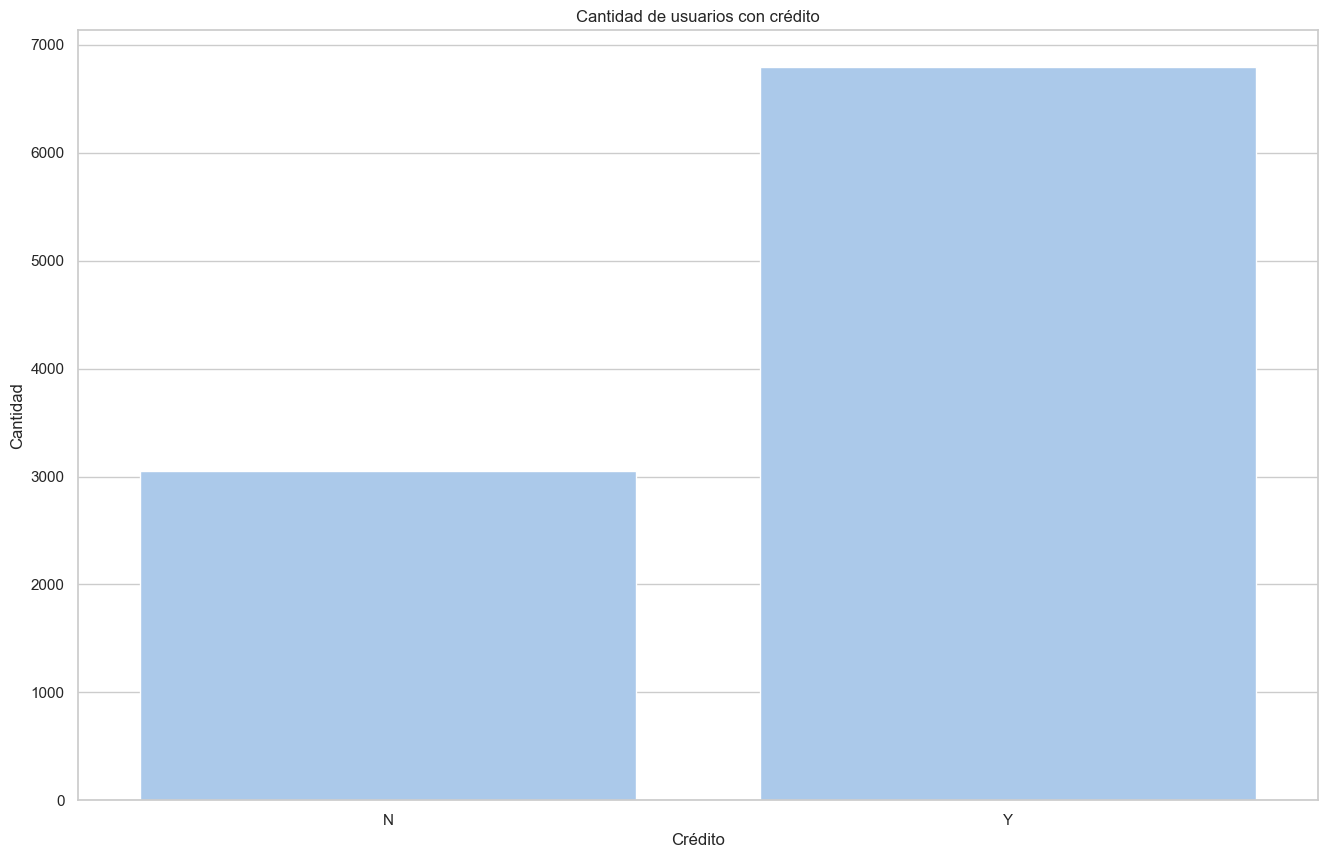

In [13]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(16, 10))
sns.set_color_codes("pastel")

ax = sns.barplot(x="creditcd", y="Customer_ID", data=df.groupby('creditcd')['Customer_ID'].count().reset_index(), color="b")
ax.set(xlabel="Crédito", ylabel="Cantidad", title="Cantidad de usuarios con crédito")

<Figure size 1600x1000 with 0 Axes>

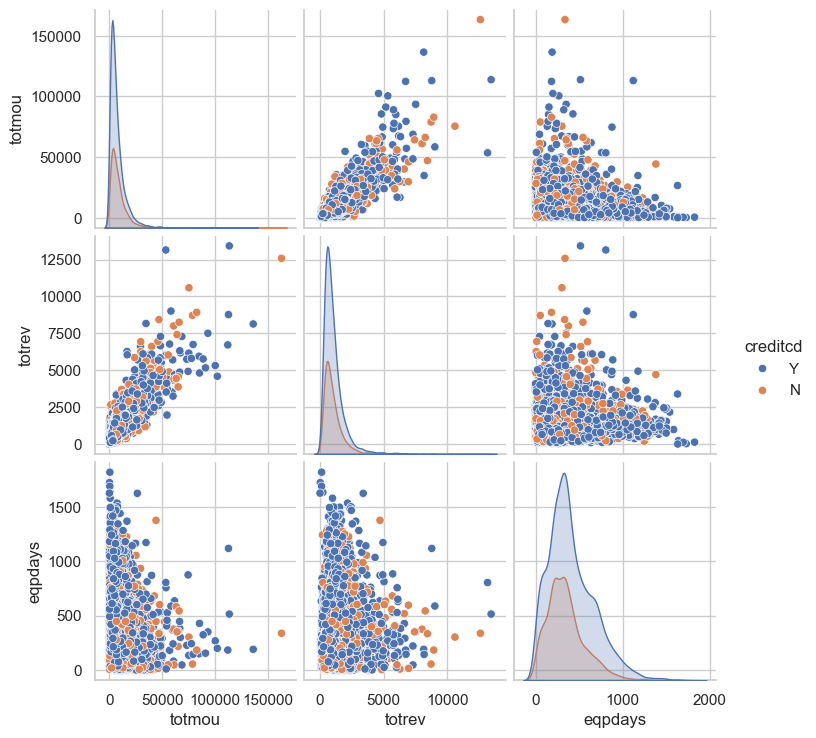

In [16]:
ax = sns.pairplot(df.drop(columns=["Customer_ID"]), hue='creditcd')

Encontramos una división desequilibrada de clases entre los usuarios que tienen crédito, siendo de al rededor de un 30% los que no poseen crédito y un 70% los que si poseen. A su vez por medio de los histogramas podemos sacar una conclusión de que no hace diferencia si los clientes tienen o no tienen crédito, pues tienen un comportamiento similar y su única diferencia llega a ser la diferencia de proporciones, pero eso ya se da por lo mencionado anteriormente, el desequilibrio de esta clasificación en la data.

A su vez encontramos una relación posiblemente líneal entre el total de minutos usados por el cliente (totmou) y los ingresos del cliente (totrev).